In [1]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
saledata = pd.read_csv("sale_data.csv")

In [3]:
saledata.head()

,YEAR_MONTH_SALE_DATE,COUNT_YEAR_MONTH_SALE_SAMPLE
0,2007-01,50
1,2007-02,46
2,2007-03,52
3,2007-04,48
4,2007-05,40


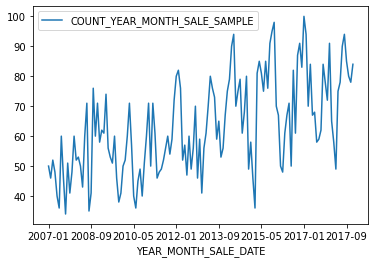

In [4]:
saledata.plot.line(x = 'YEAR_MONTH_SALE_DATE', 
             y = 'COUNT_YEAR_MONTH_SALE_SAMPLE')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


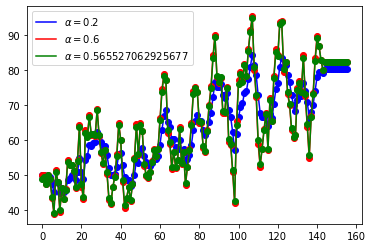

In [6]:
# Simple Exponential Smoothing
fit1 = SimpleExpSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE']).fit(smoothing_level=0.2,optimized=False)
fcast1 = fit1.forecast(12).rename(r'$\alpha=0.2$')
# plot
fcast1.plot(marker='o', color='blue', legend=True)
fit1.fittedvalues.plot(marker='o',  color='blue')



fit2 = SimpleExpSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE']).fit(smoothing_level=0.6,optimized=False)
fcast2 = fit2.forecast(12).rename(r'$\alpha=0.6$')
# plot
fcast2.plot(marker='o', color='red', legend=True)
fit2.fittedvalues.plot(marker='o', color='red')


fit3 = SimpleExpSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE']).fit()
fcast3 = fit3.forecast(12).rename(r'$\alpha=%s$'%fit3.model.params['smoothing_level'])
# plot
fcast3.plot(marker='o', color='green', legend=True)
fit3.fittedvalues.plot(marker='o', color='green')

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\DEATHS~1\AppData\Local\Temp/ipykernel_2632/1632288122.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit1 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
C:\Users\DEATHS~1\AppData\Local\Temp/ipykernel_2632/1632288122.py:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit2 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
C:\Users\DEATHS~1\AppData\Local\Temp/ipykernel_2632/1632288122.py:7: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], damped=True).fit(smoothing_level=0.8, smoot

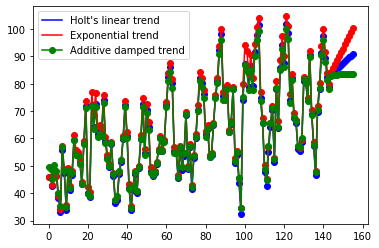

In [7]:
fit1 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE']).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast1 = fit1.forecast(12).rename("Holt's linear trend")

fit2 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], exponential=True).fit(smoothing_level=0.8, smoothing_slope=0.2, optimized=False)
fcast2 = fit2.forecast(12).rename("Exponential trend")

fit3 = Holt(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], damped=True).fit(smoothing_level=0.8, smoothing_slope=0.2)
fcast3 = fit3.forecast(12).rename("Additive damped trend")


fit1.fittedvalues.plot(marker="o", color='blue')
fcast1.plot(color='blue', marker="o", legend=True)
fit2.fittedvalues.plot(marker="o", color='red')
fcast2.plot(color='red', marker="o", legend=True)
fit3.fittedvalues.plot(marker="o", color='green')
fcast3.plot(color='green', marker="o", legend=True)

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:1112: FutureWarning: Setting use_boxcox during fit has been deprecated and will be removed after 0.13. It must be set during model initialization.
  warnings.warn(
C:\Users\DEATHS~1\AppData\Local\Temp/ipykernel_2632/759048420.py:3: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit3 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
C:\Users\DEATHS~1\AppData\Local\Temp/ipykernel_2632/759048420.py:4: FutureWarning: the 'damped'' keyword is deprecated, use 'damped_trend' instead
  fit4 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='mul', damped=Tr

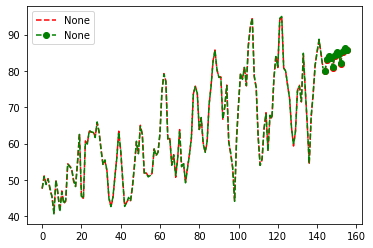

Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.


In [9]:
fit1 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='add').fit(use_boxcox=True)
fit2 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='mul').fit(use_boxcox=True)
fit3 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='add', damped=True).fit(use_boxcox=True)
fit4 = ExponentialSmoothing(saledata['COUNT_YEAR_MONTH_SALE_SAMPLE'], seasonal_periods=4, trend='add', seasonal='mul', damped=True).fit(use_boxcox=True)
fit1.fittedvalues.plot(style='--', color='red')
fit2.fittedvalues.plot(style='--', color='green')

fit1.forecast(12).plot(style='--', marker='o', color='red', legend=True)
fit2.forecast(12).plot(style='--', marker='o', color='green', legend=True)

plt.show()
print("Forecasting sales of properties using Holt-Winters method with both additive and multiplicative seasonality.")